# Time Series Forecasting: Daily Covid Cases in the US

## Data Description

The given data consists of daily new Covid cases in United States from January 2020 to January 2022. The data has been sourced from https://ourworldindata.org/covid-cases. The number of new COVID-19 cases in the country continues to report soaring rates of new infections due to the rapid spread of the highly transmissible omicron variant. This projects aims to forecast the number of new cases going ahead in 2022 and also try to determine when will this new wave due to the omicron variant come to an end. The reason for choosing this dataset is that Covid is something that has become a part of everone's life and people have questions regarding how long this pandemic is going to last. The variations in the data is due to the multiplicative factor by which the virus continues to spread. This can lead to an exponential pattern in which the virus is spreading and can be forecasted well using time series forecasting methods.

## Data Importing and Preprocessing

In [1]:
#importing libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/rajesh/downloads/covid.csv')

In [3]:
df.head()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,USA,United States,2020-01-22,1,NaN,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
1,USA,United States,2020-01-23,1,0.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2,USA,United States,2020-01-24,2,1.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
3,USA,United States,2020-01-25,2,0.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4,USA,United States,2020-01-26,5,3.0,NaN,NaN,NaN,NaN,0.015,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


The above data shows total cases and daily new cases for the United States on a daily basis starting January 22, 2020. Here, new cases for the first day is NaN, we need to replace it with 1.

In [4]:
# Replacing new cases for the first day
df['new_cases'][0] = 1
df.head()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,USA,United States,2020-01-22,1,1.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
1,USA,United States,2020-01-23,1,0.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2,USA,United States,2020-01-24,2,1.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
3,USA,United States,2020-01-25,2,0.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4,USA,United States,2020-01-26,5,3.0,NaN,NaN,NaN,NaN,0.015,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [5]:
#Checking for null values in the data
df.isnull().sum()

iso_code                            0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  6
total_deaths                       38
new_deaths                         38
new_deaths_smoothed                38
total_cases_per_million             0
new_cases_per_million               1
new_cases_smoothed_per_million      6
stringency_index                    2
population                          0
population_density                  0
median_age                          0
aged_70_older                       0
gdp_per_capita                      0
cardiovasc_death_rate               0
diabetes_prevalence                 0
female_smokers                      0
male_smokers                        0
handwashing_facilities            744
hospital_beds_per_thousand          0
life_expectancy                     0
human_development_index             0
dtype: int64

The data is clean and has no null values. Since the data is only for United States, we can drop the location column.

In [6]:
#dropping location
df = df.drop('location',axis=1)

In [7]:
#Checking for data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 25 columns):
iso_code                          744 non-null object
date                              744 non-null object
total_cases                       744 non-null int64
new_cases                         744 non-null float64
new_cases_smoothed                738 non-null float64
total_deaths                      706 non-null float64
new_deaths                        706 non-null float64
new_deaths_smoothed               706 non-null float64
total_cases_per_million           744 non-null float64
new_cases_per_million             743 non-null float64
new_cases_smoothed_per_million    738 non-null float64
stringency_index                  742 non-null float64
population                        744 non-null int64
population_density                744 non-null float64
median_age                        744 non-null float64
aged_70_older                     744 non-null float64
gdp_per_capita       

We would need to change the data type of date and new cases.

In [8]:
#changing data types
df['date']= pd.to_datetime(df['date'])
df['new_cases']=df['new_cases'].astype('int')

In [9]:
print('Time period start: {}\nTime period end: {}'.format(df.date.min(),df.date.max()))

Time period start: 2020-01-22 00:00:00
Time period end: 2022-02-03 00:00:00


We can see that the data is from 22 January 2020 to February 23 2022.

In [10]:
df.shape

(744, 25)

There are total 764 days of data

In [11]:
#Checking for some basic statistics
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.440000e+02,7.440000e+02,738.000000,706.000000,706.000000,706.000000,744.000000,743.000000,738.000000,742.000000,...,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,0.0,7.440000e+02,7.440000e+02,7.440000e+02
mean,2.319419e+07,1.021005e+05,101561.209238,425723.453258,1269.910765,1258.856516,69669.987590,307.099001,305.066419,57.997601,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
std,1.926551e+07,1.494797e+05,136232.296197,265082.453598,966.774529,783.976330,57869.132077,449.163618,409.210351,16.323806,...,2.666328e-14,4.368511e-11,2.986287e-12,3.199593e-14,2.381919e-13,7.821228e-14,NaN,1.510919e-14,4.692737e-13,4.888268e-15
min,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.143000,0.003000,0.000000,0.000000,0.000000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
25%,4.207094e+06,2.749950e+04,28581.786000,176657.500000,522.000000,716.106750,12637.138750,82.695500,85.853000,52.310000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
50%,2.583301e+07,5.544150e+04,62191.000000,488670.000000,1007.500000,1038.785500,77596.382500,166.664000,186.807500,61.570000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
75%,3.516839e+07,1.225528e+05,121768.714500,618621.250000,1832.250000,1728.892750,105637.710750,368.438000,365.765500,68.980000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
max,7.596275e+07,1.368873e+06,802698.857000,896557.000000,4442.000000,3403.000000,228174.555000,4111.778000,2411.122000,75.460000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01


In [12]:
#Setting date column as index of the dataframe
df = df.set_index('date')

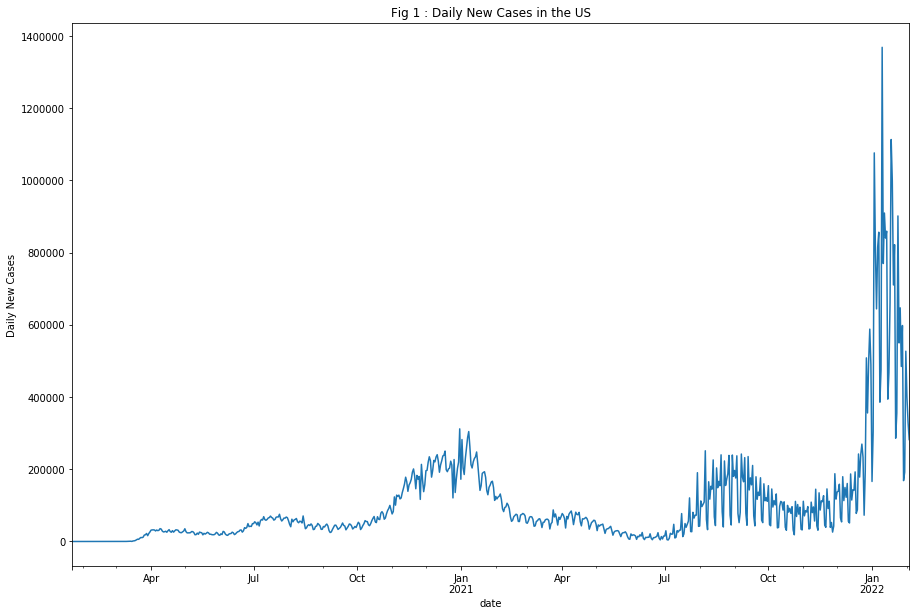

In [13]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Fig 1 : Daily New Cases in the US')
df['new_cases'].plot()
plt.show()

We can see that the daily new cases started to increase gradually through 2020 and then went up exponentially around early part of 2021. We saw a third wave of the virus in the third quarter of 2021. Due to the outbreak of the Omicron variant, we saw a big spike in terms of the number of new cases in early 2022.

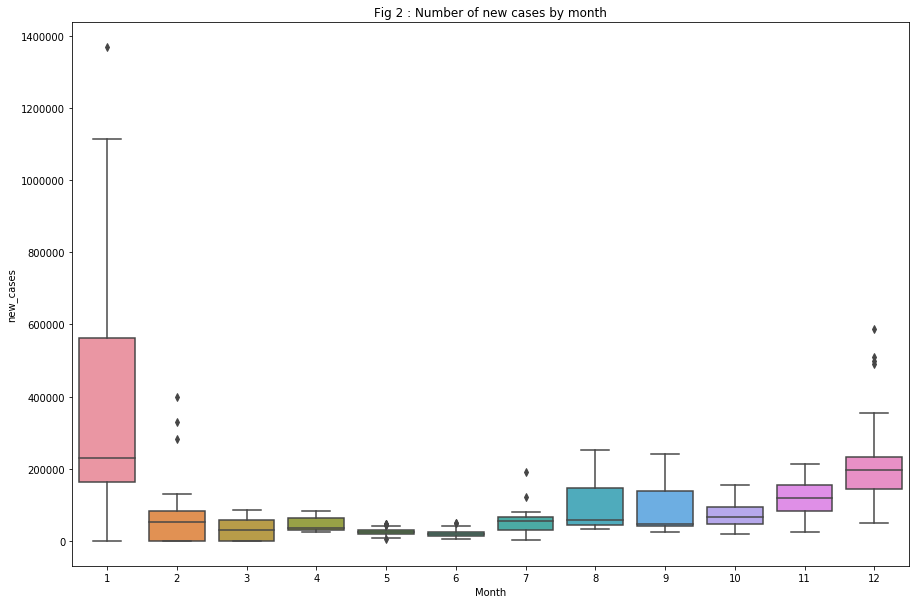

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(df.index.month, df['new_cases'])
plt.xlabel('Month')
plt.title('Fig 2 : Number of new cases by month')
plt.show()

The above chart shows the distribution of number of daily cases month wise. Since we have almost seen 2 complete years of Covid 19, the box plots are showing aggregation results for each month. Clearly, the month of January has seen the highest number of cases followed by August and September.

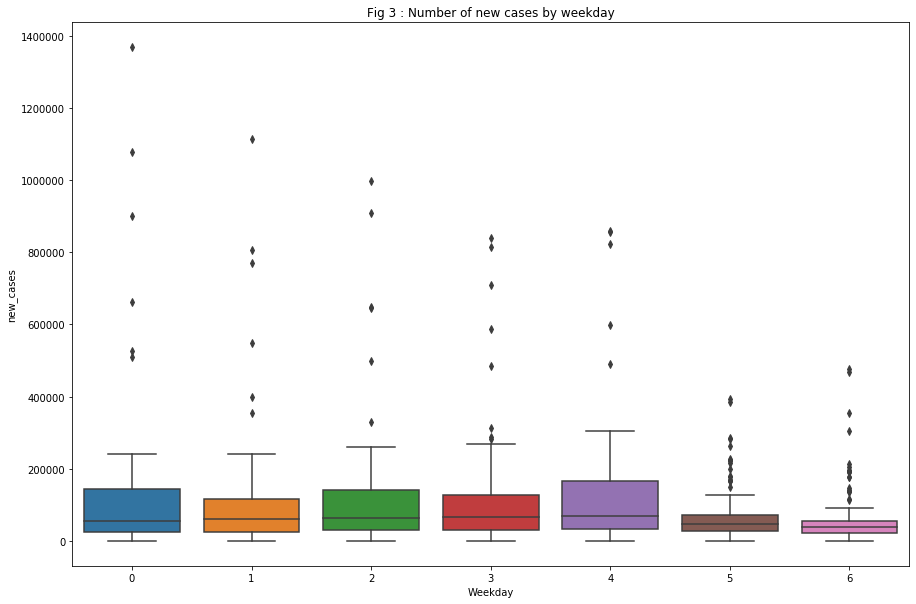

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(df.index.weekday, df['new_cases'])
plt.xlabel('Weekday')
plt.title('Fig 3 : Number of new cases by weekday')
plt.show()

Here 0 stands for Monday and 6 represents Sunday. We can observe a weekly seasonality in this time series with Saturdays and Sundays having comparatively lesser new cases as compared to weekdays.

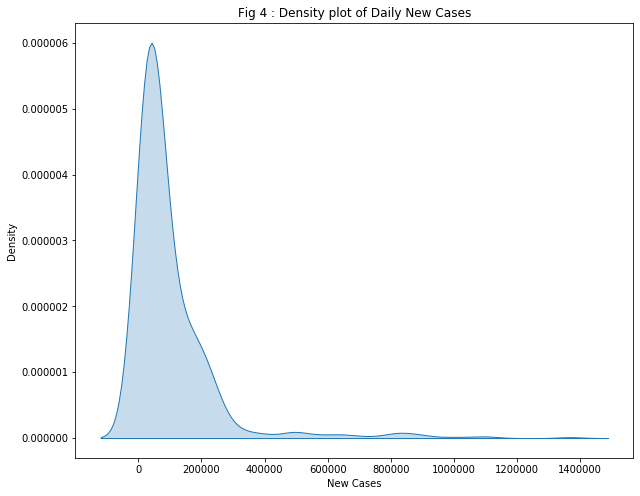

In [16]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['new_cases'],shade=True)
plt.title('Fig 4 : Density plot of Daily New Cases')
plt.xlabel('New Cases')
plt.show()

The density plot above shows the distribution of the number of cases. We can see that the major frequency lies in the region less than 200k

Since we are dealing with forecasting the new cases, we would remove all other columns from the dataframe

In [17]:
#reducing the dataframe to just the new cases
df = df['new_cases']

In [18]:
df = pd.DataFrame(df)
df.head()

,new_cases
date,
2020-01-22,1
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,3


## ARIMA Modeling

In order to fit an ARIMA model, we need to make the time series mean and variance stationary. Looking at figure 1 above, we can conclude that the series is not variance stationary. We will run some tests later on to test the mean stationarity.

### Making the series variance stationary by applying a log transformation

In [19]:
#applying log transformation
ln_df = np.log(df)

In [20]:
ln_df.head()

,new_cases
date,
2020-01-22,0.000000
2020-01-23,-inf
2020-01-24,0.000000
2020-01-25,-inf
2020-01-26,1.098612


Here, we are observing infinity as log transformation of 0. Since January and February 2020 were early days for the virus to spread, we can replace 0s with 1 for these 2 months and reapply a log transformation.

In [21]:
df[df['new_cases']==0]=1
df.head()

,new_cases
date,
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1
2020-01-26,3


In [22]:
#reapplying log transformation
ln_df = np.log(df)
ln_df.head()

,new_cases
date,
2020-01-22,0.000000
2020-01-23,0.000000
2020-01-24,0.000000
2020-01-25,0.000000
2020-01-26,1.098612


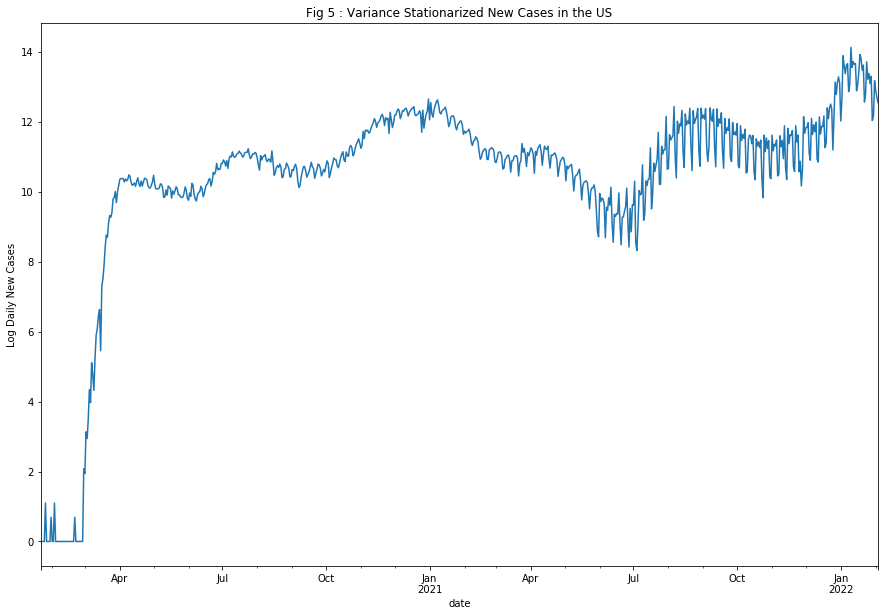

In [23]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Log Daily New Cases')
plt.title('Fig 5 : Variance Stationarized New Cases in the US')
ln_df['new_cases'].plot()
plt.show()

We can observe that the time series is now variance stationary. However, we need to check whether it is mean stationary.

### Checking for mean stationarity

In [24]:
# Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(ln_df)

(-5.540164824384124,
 1.7088131125725618e-06,
 20,
 723,
 {'1%': -3.4394269973845657,
  '5%': -2.8655458544300387,
  '10%': -2.568903174551249},
 51.26218948320934)

The p value obtained is lower than 0.05. This indicates that the data is mean stationary.

In [25]:
# KPSS test
from statsmodels.tsa.stattools import kpss
kpss(ln_df)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.216342109764273,
 0.01,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The p value obtained is 0.01 (less than 0.05), which indicates that the data is mean non stationary

### Calculating first difference to make the series mean stationary

In [26]:
df_diff = pd.DataFrame(ln_df['new_cases'] - ln_df['new_cases'].shift(1))
df_diff.head()

,new_cases
date,
2020-01-22,NaN
2020-01-23,0.000000
2020-01-24,0.000000
2020-01-25,0.000000
2020-01-26,1.098612


In [27]:
#removing missing value
df_diff = df_diff.dropna()
df_diff.head()

,new_cases
date,
2020-01-23,0.000000
2020-01-24,0.000000
2020-01-25,0.000000
2020-01-26,1.098612
2020-01-27,-1.098612


In [28]:
# Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df_diff)

(-3.4042245961827335,
 0.010815695717420207,
 20,
 722,
 {'1%': -3.439439614524914,
  '5%': -2.865551414233055,
  '10%': -2.5689061365397747},
 63.38143832945161)

The p-value of the ADF test now comes out to be 0.01, which indicates mean stationary data.

In [29]:
# KPSS test
from statsmodels.tsa.stattools import kpss
kpss(df_diff)

(0.42165734601281957,
 0.06782010947723295,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The p-value of the KPSS test now comes out to be greater than 0.05, which indicates mean stationary data.

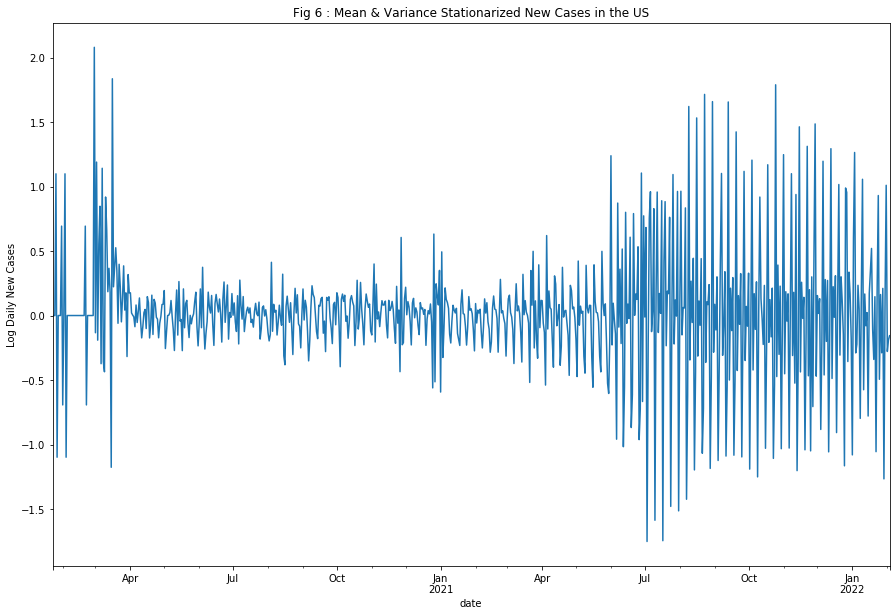

In [30]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Log Daily New Cases')
plt.title('Fig 6 : Mean & Variance Stationarized New Cases in the US')
df_diff['new_cases'].plot()
plt.show()

As seen in the above plot, the time series now seems to be both mean and variance stationary.

### Plotting ACF and PACF

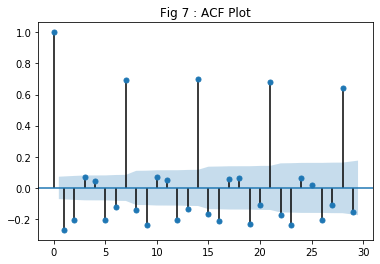

In [31]:
#plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff)
plt.title('Fig 7 : ACF Plot')
plt.show()

The ACF shows high correlation as well as dampening effect at every 7th lag, which indicates a weekly seasonality. Since we can see 3 time series elements show correlation more than the significance level, it looks like a MA 3 process.

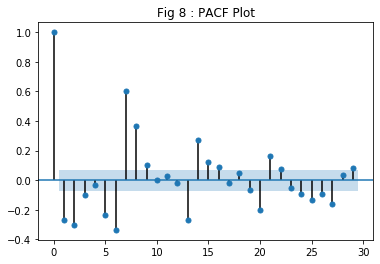

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff)
plt.title('Fig 8 : PACF Plot')
plt.show()

Since we can see 2 time series elements show correlation more than the significance level, it looks like a AR 2 process.

### Plotting ARIMA Models

In [33]:
# Model 1 (2,1,3)
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(ln_df['new_cases'], order=(3,1,2))
model1_fit = model1.fit(disp=1)
print(model1_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  743
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -322.753
Method:                       css-mle   S.D. of innovations              0.368
Date:                Thu, 20 Jul 2023   AIC                            659.505
Time:                        08:10:59   BIC                            691.780
Sample:                    01-23-2020   HQIC                           671.947
                         - 02-03-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0168        nan        nan        nan         nan         nan
ar.L1.D.new_cases    -0.7648        nan        nan        nan         nan         nan
ar.L2.D.new_cases    -1.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [34]:
# Model 2 (2,2,3)
model2 = ARIMA(ln_df['new_cases'], order=(2,1,0))
model2_fit = model2.fit()
print(model2_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  743
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -421.413
Method:                       css-mle   S.D. of innovations              0.427
Date:                Thu, 20 Jul 2023   AIC                            850.826
Time:                        08:10:59   BIC                            869.269
Sample:                    01-23-2020   HQIC                           857.936
                         - 02-03-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0170      0.009      1.799      0.072      -0.002       0.036
ar.L1.D.new_cases    -0.3511      0.035    -10.043      0.000      -0.420      -0.283
ar.L2.D.new_cases    -0.

In [35]:
# Model 3 (4,1,3)
model3 = ARIMA(ln_df['new_cases'], order=(4,1,3))
model3_fit = model3.fit()
print(model3_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  743
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -313.424
Method:                       css-mle   S.D. of innovations              0.368
Date:                Thu, 20 Jul 2023   AIC                            644.849
Time:                        08:11:02   BIC                            686.345
Sample:                    01-23-2020   HQIC                           660.845
                         - 02-03-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0174      0.014      1.227      0.220      -0.010       0.045
ar.L1.D.new_cases     0.1971      0.053      3.694      0.000       0.093       0.302
ar.L2.D.new_cases    -0.

In [36]:
# Model 4 (3,2,2)
model4 = ARIMA(ln_df['new_cases'], order=(3,2,2))
model4_fit = model4.fit()
print(model4_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D2.new_cases   No. Observations:                  742
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -419.992
Method:                       css-mle   S.D. of innovations              0.425
Date:                Thu, 20 Jul 2023   AIC                            853.984
Time:                        08:11:04   BIC                            886.249
Sample:                    01-24-2020   HQIC                           866.422
                         - 02-03-2022                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0001      0.000     -1.002      0.316      -0.000       0.000
ar.L1.D2.new_cases    -0.8081      0.135     -5.973      0.000      -1.073      -0.543
ar.L2.D2.new_cases  

Based on the 4 ARIMA models fit, Model 3 ARIMA (4,1,3) is the best model according to AIC and BIC both

### Fitting an Auto ARIMA Model

In [37]:
from pmdarima.arima import auto_arima
model = auto_arima(ln_df['new_cases'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(ln_df['new_cases'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1663.088, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1426.277, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1218.299, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1104.470, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1093.714, Time=0.10 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1088.823, Time=0.12 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=769.745, Time=0.36 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=846.577, Time=0.36 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=599.738, Time=1.12 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=835.350, Time=0.76 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=inf, Time=1.59 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=643.650, Time=1

ARIMA(order=(5, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Auto ARIMA suggests order of (5,2,2) as the best model.

In [38]:
# fitting the best model (5,2,2)
model5 = ARIMA(ln_df['new_cases'], order=(5,2,2))
model5_fit = model5.fit()
print(model5_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D2.new_cases   No. Observations:                  742
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -291.148
Method:                       css-mle   S.D. of innovations              0.356
Date:                Thu, 20 Jul 2023   AIC                            600.296
Time:                        08:11:18   BIC                            641.780
Sample:                    01-24-2020   HQIC                           616.288
                         - 02-03-2022                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.003     -0.115      0.908      -0.006       0.005
ar.L1.D2.new_cases    -0.1151      0.029     -3.942      0.000      -0.172      -0.058
ar.L2.D2.new_cases  

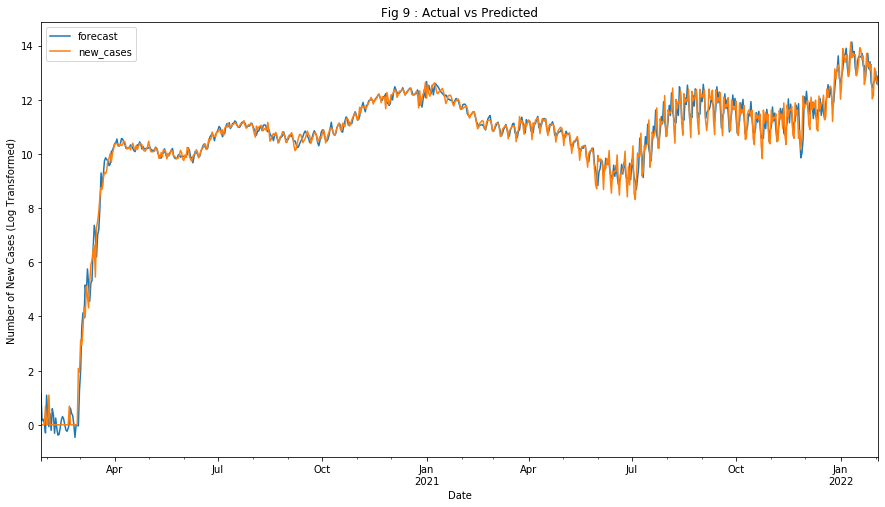

In [39]:
# Plotting the predicted and actual values using best model
fig, ax = plt.subplots(figsize = (15,8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of New Cases (Log Transformed)')
model5_fit.plot_predict(5, ax = ax)
plt.title('Fig 9 : Actual vs Predicted')
plt.show()

The plot shows that the predicted and original data seem close to each other. The model looks like a good fit.

### Residual Analysis

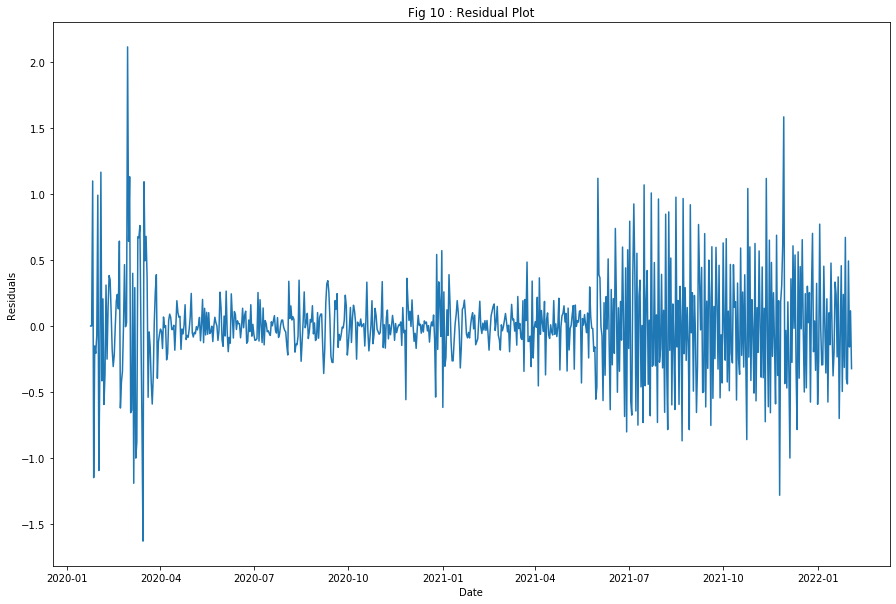

In [40]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Fig 10 : Residual Plot')
residuals = pd.DataFrame(model5_fit.resid)
plt.plot(residuals)
plt.show()

As seen from the above chart, the residuals look like white noise having no autocorrelation

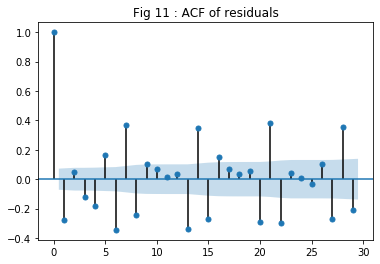

In [41]:
#examining acf of residuals
plot_acf(residuals)
plt.title('Fig 11 : ACF of residuals')
plt.show()

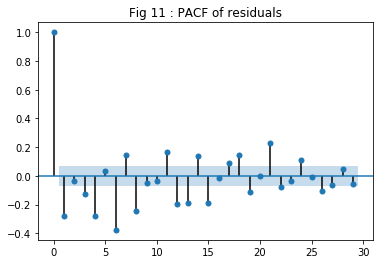

In [42]:
#examining pacf of residuals
plot_pacf(residuals)
plt.title('Fig 11 : PACF of residuals')
plt.show()

The PACF does not show any significant autocorrelation among the residuals. We can confirm the same by applying a Box Ljung Test.

In [43]:
# applying Box Ljung Test
import statsmodels.api as sm
ljung = sm.stats.acorr_ljungbox(residuals, lags= 5)
p_value = ljung[1][-1] * 10000000000000
print('p value obtained is ',p_value)

p value obtained is  1.9427211876625945e-10


The p value of Box Ljung test is greater than 0.05, which indicates that the residuals are independent.

### Evaluating in sample performance through RMSE

In [44]:
# getting predictions and taking inverse of log to get back to original scale
predictions = pd.DataFrame(model5_fit.predict())
predictions.columns = ['Prediction']
predictions['Prediction'] = np.exp(predictions['Prediction'])

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df['new_cases'][2:], predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 181181.234851


In [46]:
# generating foreacasts for the next 30 days
n=30
forecast,err,ci = model5_fit.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2022/01/20', periods=n))

In [47]:
#taking inverse of log to get back to original scale
df_forecast['forecast'] = np.exp(df_forecast['forecast'])
df_forecast.head()

,forecast
2022-01-20,192216.351806
2022-01-21,93894.263337
2022-01-22,116814.531396
2022-01-23,161994.852855
2022-01-24,166325.360466


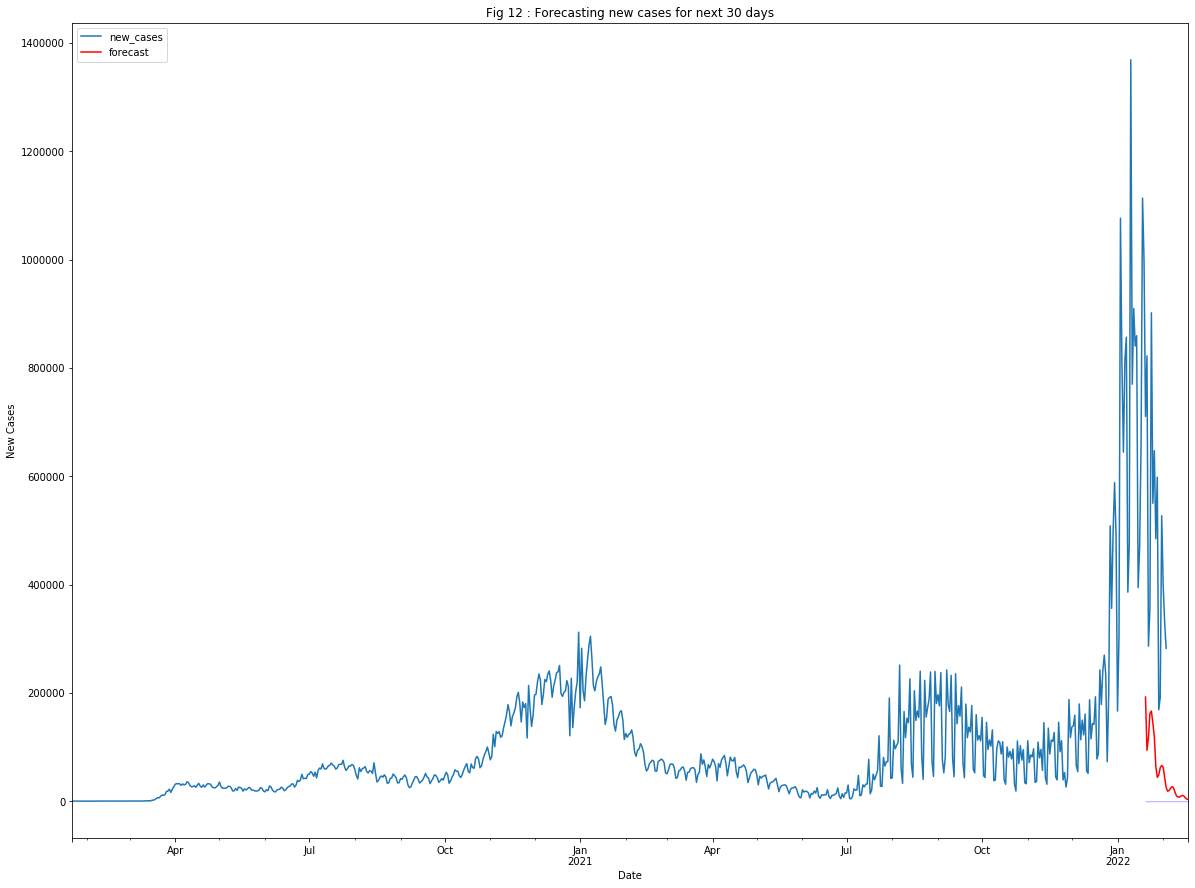

In [48]:
ax = df.plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.title('Fig 12 : Forecasting new cases for next 30 days')
plt.legend()
plt.show()

## Facebook Prophet Model

In [49]:
# initializing Prophet Model
from fbprophet import Prophet
model = Prophet()

In [50]:
#creating a new dataframe and renaming the columns of the dataframe
dfb = df.reset_index()
dfb.columns=['ds','y']
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
# Create Future dates
future = model.make_future_dataframe(periods=365)

# Predict Prices
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1104,2023-01-30,900656.731991,657125.961852,1.131294e+06
1105,2023-01-31,876162.178132,636356.136705,1.112773e+06
1106,2023-02-01,871777.899107,636384.541738,1.112012e+06
1107,2023-02-02,861341.854658,613319.243620,1.110945e+06
1108,2023-02-03,869280.852815,628127.616351,1.110684e+06


The model successfully forecasted the number of new cases for the next 365 days. We can see the forecasted values of the time series for the last 5 days of the forecasted period along with their upper and lower bound.

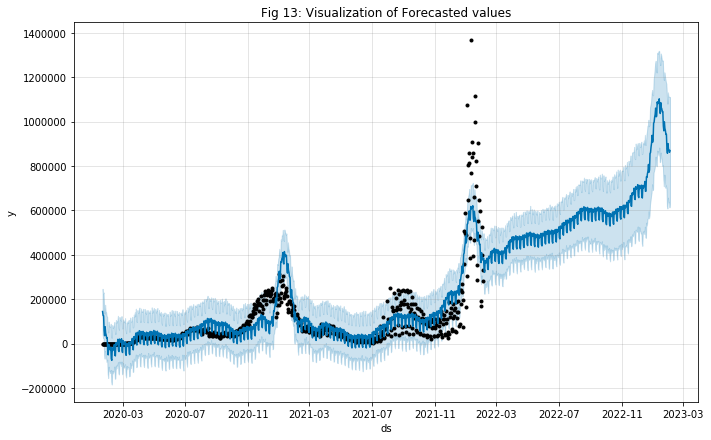

In [52]:
#visualizing the forecasted values
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title('Fig 13: Visualization of Forecasted values')
plt.show()

The above plot shows that the model does a good job in forecasting the in sample values of the time series.

The model should not take into account a saturating minimum or maximum point since all the values forecasted by the model are reasonable enough.

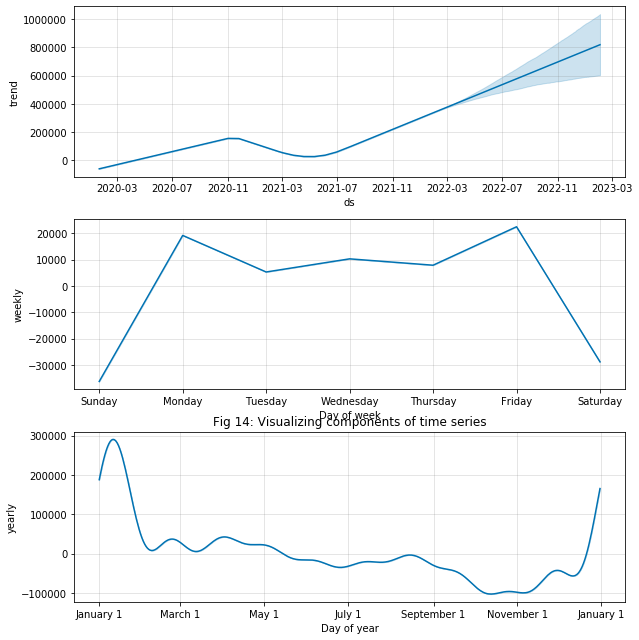

In [53]:
# visualizing components of the time series
model.plot_components(forecast)
plt.title('Fig 14: Visualizing components of time series')
plt.show()

It is quite evident that COVID 19 daily cases follow a weekly seasonality. As we can see in the above chart, there are less number of new cases on weekends as compared to weekdays.

In [54]:
# calculating in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

78788.51734423793

### Changepoint Analysis

In [55]:
#listing the potential changepoints
model.changepoints

24    2020-02-15
48    2020-03-10
71    2020-04-02
95    2020-04-26
119   2020-05-20
143   2020-06-13
166   2020-07-06
190   2020-07-30
214   2020-08-23
238   2020-09-16
261   2020-10-09
285   2020-11-02
309   2020-11-26
333   2020-12-20
356   2021-01-12
380   2021-02-05
404   2021-03-01
428   2021-03-25
451   2021-04-17
475   2021-05-11
499   2021-06-04
523   2021-06-28
546   2021-07-21
570   2021-08-14
594   2021-09-07
Name: ds, dtype: datetime64[ns]

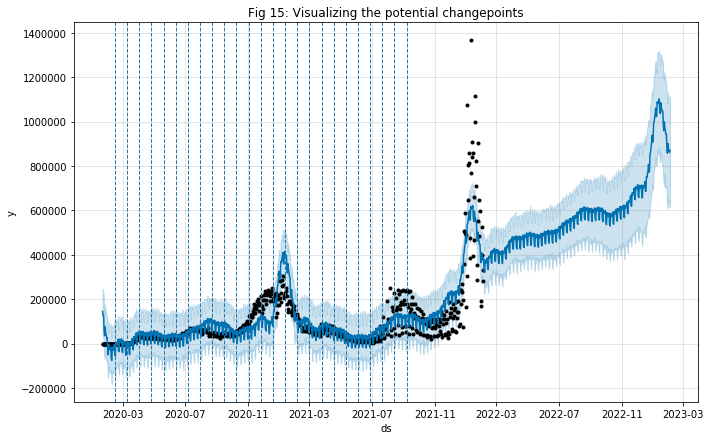

In [56]:
#visualizing the potential changepoints
figure = model.plot(forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)
    plt.title('Fig 15: Visualizing the potential changepoints')

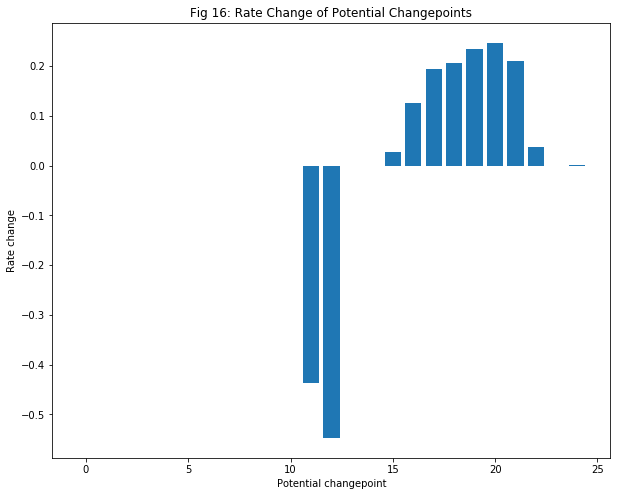

In [57]:
# visualizing the rate change of all potential changepoints
deltas = model.params['delta'].mean(0)
fig = plt.figure(figsize=(10,8))
plt.bar(range(len(deltas)),deltas)
plt.ylabel('Rate change')
plt.xlabel('Potential changepoint')
plt.title('Fig 16: Rate Change of Potential Changepoints')
plt.show()

We can see that the last 5 changepoints have the most significant rate changes, and hence are contributing most to the trend. Apart from these, changepoints 13,14 and 15 are also contributing to the trend.

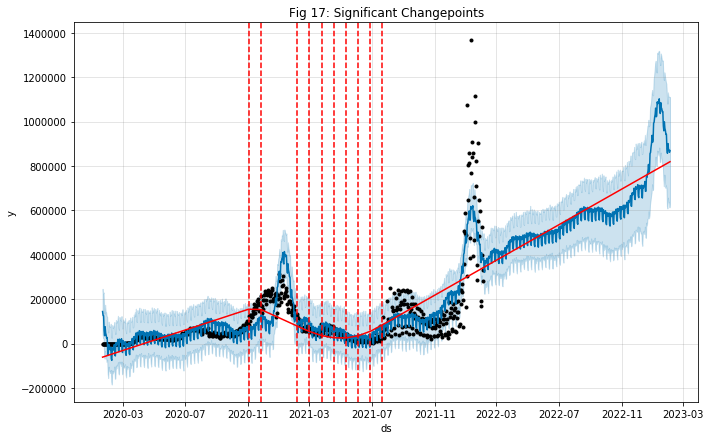

In [58]:
#visualizing the significant changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.title('Fig 17: Significant Changepoints')
plt.show()

As highlighted above, total 8 changepoints are contributing significantly towards the trend of the time series

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Fig 18: Examining the performance with 50 changepoints')

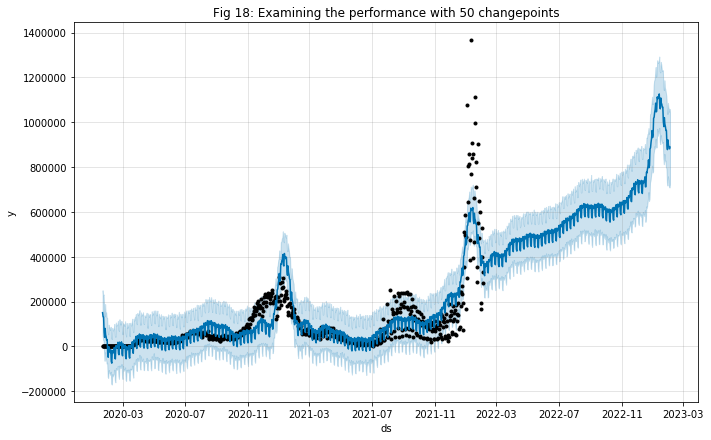

In [59]:
#examining performance with 50 changepoints
model = Prophet(n_changepoints=50)
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 18: Examining the performance with 50 changepoints')

In [60]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

79408.90870347829

In sample RMSE of the model with 50 changepoints is higher than the model with 25 changepoints. We would go ahead with 25 changepoints.

### Seasonality Assessment

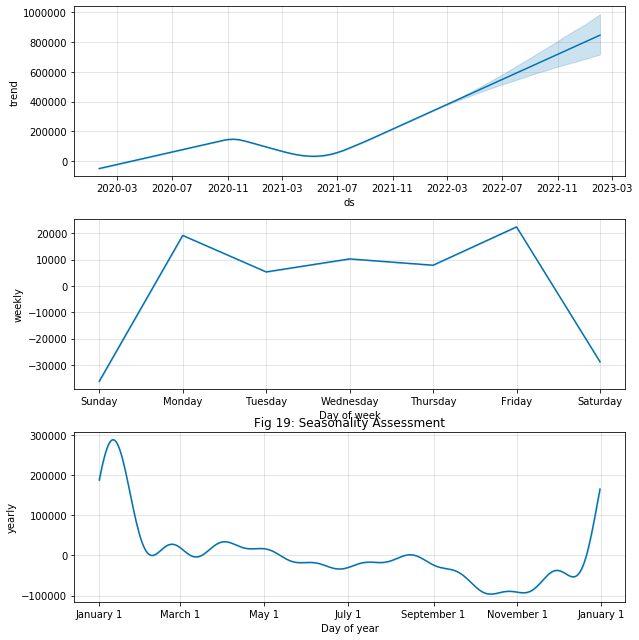

In [61]:
model.plot_components(forecast)
plt.title('Fig 19: Seasonality Assessment')
plt.show()

As concluded above as well, the time series follows a weekly seasonality. We need to examine further to understand whether it is additive seasonality or multiplicative seasonality.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


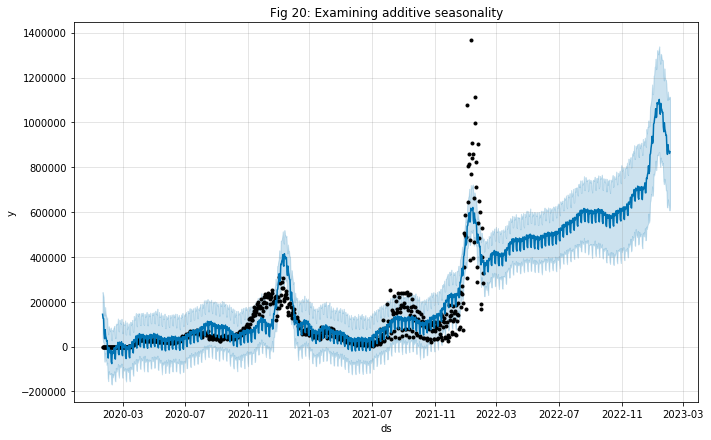

In [62]:
#examining additive seasonality
model = Prophet(seasonality_mode='additive')
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 20: Examining additive seasonality')
plt.show()

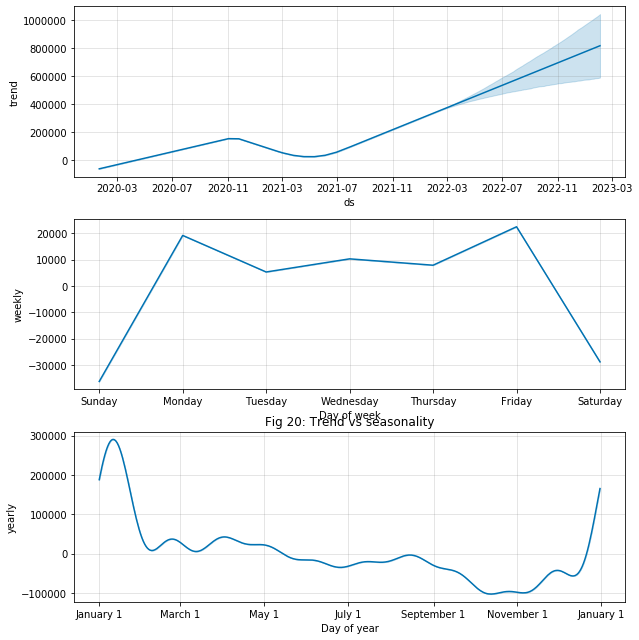

In [63]:
model.plot_components(forecast)
plt.title('Fig 20: Trend vs seasonality')
plt.show()

From the above decomposition chart, we can observe that the trend is driving the forecasted values more as compared to the seasonality.

In [64]:
# calculating in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

78788.51734423793

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


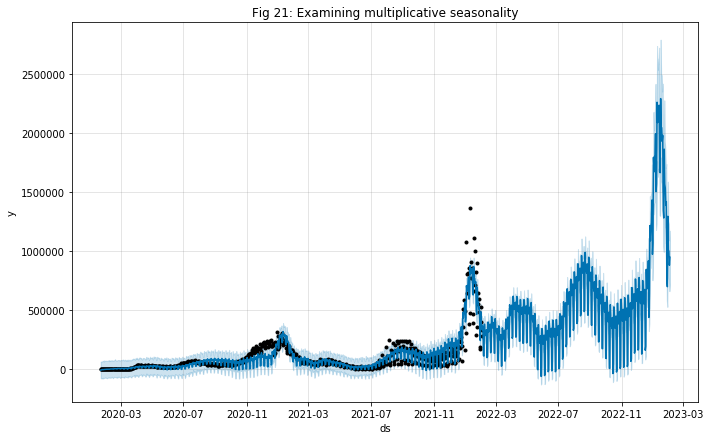

In [65]:
#examining multiplicative seasonality
model = Prophet(seasonality_mode='multiplicative')
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 21: Examining multiplicative seasonality')
plt.show()

We can see that the variance of the values forecasted by mutliplicative seasonality keeps on increasing with time

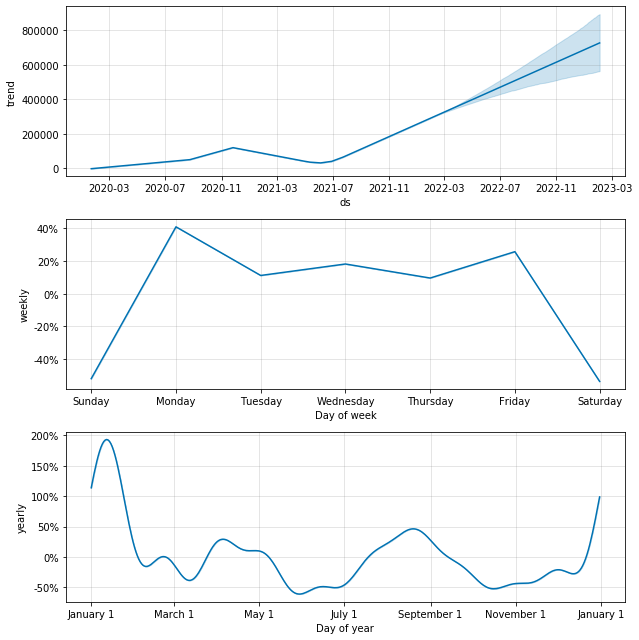

In [66]:
model.plot_components(forecast)
plt.show()

In [67]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

56527.768220734004

The in sample RMSE of multiplicative seasonality is slightly lower than the additive seasonality. However, difference in performance is not significant enough to prefer multiplicative seasonality over additive seasonality as the model will become more difficult to interpret. Hence, we would go ahead with additive seasonality.

### Assessment and inclusion of holidays

In [68]:
import holidays
holidays = pd.DataFrame(holidays.UnitedStates(years=[2020,2021,2022,2023]).items())
holidays.columns = ['ds','holiday']

In [69]:
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='US')
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


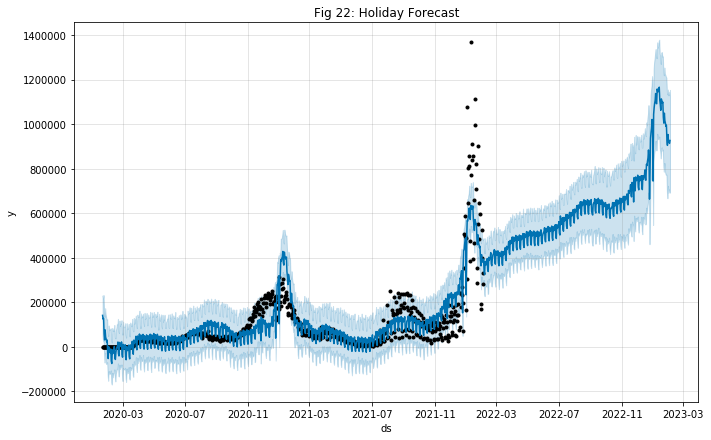

In [70]:
forecast = model.predict(future)
model.plot(forecast)
plt.title('Fig 22: Holiday Forecast')
plt.show()

In [71]:
forecast[:-365].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
739,2022-01-30,347526.318417,258567.880520,465915.745319,347526.318417,347526.318417,0.0,0.0,0.0,0.0,...,-38719.145974,-38719.145974,-38719.145974,55441.281188,55441.281188,55441.281188,0.0,0.0,0.0,364248.453631
740,2022-01-31,348969.254202,315196.487944,515336.437692,348969.254202,348969.254202,0.0,0.0,0.0,0.0,...,21304.053106,21304.053106,21304.053106,44364.263948,44364.263948,44364.263948,0.0,0.0,0.0,414637.571256
741,2022-02-01,350412.189988,292364.610697,485592.539412,350412.189988,350412.189988,0.0,0.0,0.0,0.0,...,2965.718606,2965.718606,2965.718606,34597.494276,34597.494276,34597.494276,0.0,0.0,0.0,387975.402870
742,2022-02-02,351855.125773,284545.751525,483896.978070,351855.125773,351855.125773,0.0,0.0,0.0,0.0,...,8032.795431,8032.795431,8032.795431,26184.008051,26184.008051,26184.008051,0.0,0.0,0.0,386071.929256
743,2022-02-03,353298.061559,284395.990610,481051.562763,353298.061559,353298.061559,0.0,0.0,0.0,0.0,...,7238.009850,7238.009850,7238.009850,19137.862703,19137.862703,19137.862703,0.0,0.0,0.0,379673.934112


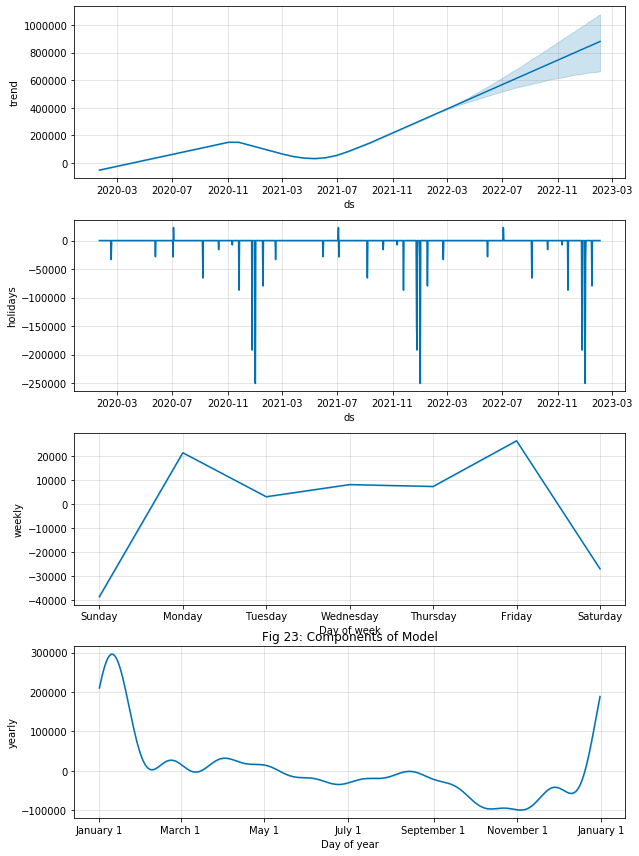

In [72]:
model.plot_components(forecast)
plt.title('Fig 23: Components of Model')
plt.show()

On observing the holiday component, we can conclude that most of the holidays have a negative impact on the number of new cases. A few holidays (yearly twice) have a positive impact on the number of new cases.

In [73]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

77207.36642716007

The in sample RMSE of the model after including holidays has improved.

## ARIMA vs Facebook Prophet

In [74]:
# splitting time series into train and test
train = df[:600]
test = df[600:]

We have split our data into training and testing dataset with first 600 days in train and the next 129 days in test.

## Fitting best ARIMA Model

The best ARIMA model obtained was ARIMA(5,2,2). We will fit that

In [75]:
# taking log of train data
ln_train = np.log(train)
ln_train.head()

,new_cases
date,
2020-01-22,0.000000
2020-01-23,0.000000
2020-01-24,0.000000
2020-01-25,0.000000
2020-01-26,1.098612


In [76]:
# fitting the best model (5,2,2)
arima = ARIMA(ln_train['new_cases'], order=(5,2,2))
arima_fit = arima.fit()
print(arima_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D2.new_cases   No. Observations:                  598
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -175.715
Method:                       css-mle   S.D. of innovations              0.323
Date:                Thu, 20 Jul 2023   AIC                            369.430
Time:                        08:12:09   BIC                            408.972
Sample:                    01-24-2020   HQIC                           384.825
                         - 09-12-2021                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0002      0.003     -0.086      0.931      -0.005       0.005
ar.L1.D2.new_cases    -0.0952      0.035     -2.726      0.006      -0.164      -0.027
ar.L2.D2.new_cases  

In [77]:
# generating foreacasts for the next 129 days
n=129
forecast,err,ci = arima_fit.forecast(steps=n)
arima_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2021/09/13', periods=n))

In [78]:
#taking inverse of log to get back to original scale
arima_forecast['forecast'] = np.exp(arima_forecast['forecast'])
arima_forecast.head()

,forecast
2021-09-13,113735.702577
2021-09-14,172244.543021
2021-09-15,141670.226860
2021-09-16,155954.372156
2021-09-17,110528.033363


In [79]:
# Calculating RMSE
yhat = arima_forecast['forecast']
y = test['new_cases']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

332310.3725734714

In [80]:
#calculating MAE
MAE = np.abs((yhat - y)).mean()
MAE

197222.72149788254

In [81]:
#calculating MAPE
MAPE = np.abs((yhat - y)/y).mean()
MAPE

0.844739632752185

### Fitting best FB Prophet Model

The best FB Prophet model obtained was the model with additive weekly seasonality which included holiday impact as well.

In [82]:
fb_train = train.reset_index()
fb_train.columns = ['ds','y']

In [83]:
# fitting the model
fb_model = Prophet(holidays=holidays)
fb_model.add_country_holidays(country_name='US')
fb_model.fit(fb_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
# Create Future dates and forecasting
future = model.make_future_dataframe(periods=0)

# Predict Prices
fb_forecast = model.predict(future)
fb_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
739,2022-01-30,364248.453631,259036.666471,456797.100111
740,2022-01-31,414637.571256,306775.241067,509123.376194
741,2022-02-01,387975.402870,285995.604386,486421.210923
742,2022-02-02,386071.929256,294812.213498,485914.372560
743,2022-02-03,379673.934112,281907.929910,476805.601088


In [85]:
# Calculating RMSE
yhat = fb_forecast['yhat'].values[600:]
y = test['new_cases']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

140839.2059826346

In [86]:
#calculating MAE
MAE = np.abs((yhat - y)).mean()
MAE

94970.50042086188

In [87]:
#calculating MAPE
MAPE = np.abs((yhat - y)/y).mean()
MAPE

0.6896204534145163

On comparing FB Prophet and ARIMA models above, both RMSE and MAE for out of sample data are better for FB Prophet whereas MAPE is better for ARIMA model. Considering these stats, we would say that FB Prophet performs better as compared to ARIMA model.